In [43]:
from keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from unet import unet_model
import random
from pathlib import Path
import logging
LOGGER = logging.getLogger()
from datetime import datetime

from skimage.morphology import binary_erosion
from skimage.morphology import skeletonize

from skimage.morphology import label
from skimage.measure import regionprops
from skimage.color import label2rgb

In [44]:
image_directory = 'dl_data/training/'
mask_directory = 'dl_data/ground_truth/'
SIZE = 512
image_dataset = []
mask_dataset = []

images = os.listdir(image_directory)
images = sorted(images)
print(images)
for index, image_name in enumerate(images):
    print(image_name)
    if (image_name.split('.')[-1] == 'png'):
        image = cv2.imread(image_directory+image_name, 0)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image = np.array(image)
        image = image - np.min(image)
        image = image / np.max(image)
        print(f'image min: {np.min(image)} image max: {np.max(image)}')
        # plt.imshow(image)
        # plt.show()
        image_flip_y = np.flip(image, axis=0)
        image_flip_x = np.flip(image, axis=1)
        image_flip_xy = np.flip(image_flip_y, 1)
        for im in [image, image_flip_y, image_flip_x, image_flip_xy]:
            image_dataset.append(im)
            image_dataset.append(cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE))
            image_dataset.append(cv2.rotate(im, cv2.ROTATE_180))
            image_dataset.append(cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE))

        # if index == 5:
        #     print('image')
        #     plt.imshow(image)
        #     plt.show()
        #     print('image flip y')
        #     plt.imshow(image_flip_y)
        #     plt.show()
        #     print('image flip x')
        #     plt.imshow(image_flip_x)
        #     plt.show()
        #     print('image flip x y')
        #     plt.imshow(image_flip_xy)
        #     plt.show()

print('----')

masks = os.listdir(mask_directory)
masks = sorted(masks)
print(masks)
for index, image_name in enumerate(masks):
    print(image_name)
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(mask_directory+image_name, 0)
        # image = Image.fromarray(image)
        # image = np.array(image).astype(bool)
        # image = skeletonize(image)
        image = Image.fromarray(image)
        image = image.resize((SIZE, SIZE))
        image = np.array(image)
        # print(image_name)
        # print(np.min(image), np.max(image))
        # plt.imshow(image.astype(bool))
        # plt.show()
        image_flip_y = np.flip(image, axis=0)
        image_flip_x = np.flip(image, axis=1)
        image_flip_xy = np.flip(image_flip_y, axis=1)
        for im in [image, image_flip_y, image_flip_x, image_flip_xy]:
            mask_dataset.append(im.astype(bool))
            mask_dataset.append(cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE).astype(bool))
            mask_dataset.append(cv2.rotate(im, cv2.ROTATE_180).astype(bool))
            mask_dataset.append(cv2.rotate(im, cv2.ROTATE_90_COUNTERCLOCKWISE).astype(bool))

        # if index == 5:
        #     print('image')
        #     plt.imshow(image)
        #     plt.show()
        #     print('image flip y')
        #     plt.imshow(image_flip_y)
        #     plt.show()
        #     print('image flip x')
        #     plt.imshow(image_flip_x)
        #     plt.show()
        #     print('image flip x y')
        #     plt.imshow(image_flip_xy)
        #     plt.show()

# for i, image_name in enumerate(masks):
#     if (image_name.split('.')[1] == 'png'):
#         image = cv2.imread(mask_directory+image_name, 0)
#         image = Image.fromarray(image)
#         image = image.resize((SIZE, SIZE))
#         mask_dataset.append(np.array(image))


['task-20-20230207_Me4_NPs_perov_1um.0_00009.png', 'task-21-20230207_Me4_NPs_perov_5um.0_00006.png', 'task-22-20230207_Me4_NPs_perov_10um.0_00007.png', 'task-23-20230207_MeO_NPs_perov_1um.0_00005.png', 'task-24-20230207_MeO_NPs_perov_5um.0_00003.png', 'task-25-a-20230207_MeO_NPs_perov_10um.0_00004.png', 'task-25-b-20230207_MeO_NPs_perov_10um.0_00004.png', 'task-25-c-20230207_MeO_NPs_perov_10um.0_00004.png', 'task-25-d-20230207_MeO_NPs_perov_10um.0_00004.png', 'task-26-20230207_MeO_perov_1um.0_00002.png', 'task-27-20230207_MeO_perov_5um.0_0000.png']
task-20-20230207_Me4_NPs_perov_1um.0_00009.png
image min: 0.0 image max: 1.0
task-21-20230207_Me4_NPs_perov_5um.0_00006.png
image min: 0.0 image max: 1.0
task-22-20230207_Me4_NPs_perov_10um.0_00007.png
image min: 0.0 image max: 1.0
task-23-20230207_MeO_NPs_perov_1um.0_00005.png
image min: 0.0 image max: 1.0
task-24-20230207_MeO_NPs_perov_5um.0_00003.png
image min: 0.0 image max: 1.0
task-25-a-20230207_MeO_NPs_perov_10um.0_00004.png
image min

image dataset size: 176
mask dataset size: 176
index: 62


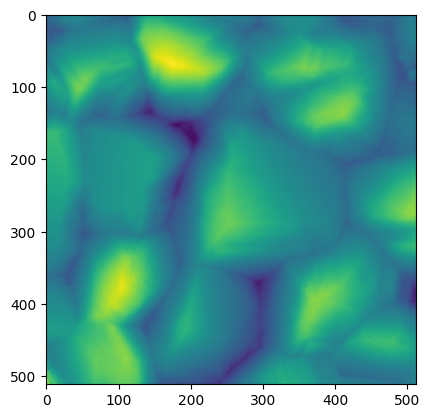

img dataset | min: 0.0 max: 1.0
(512, 512)


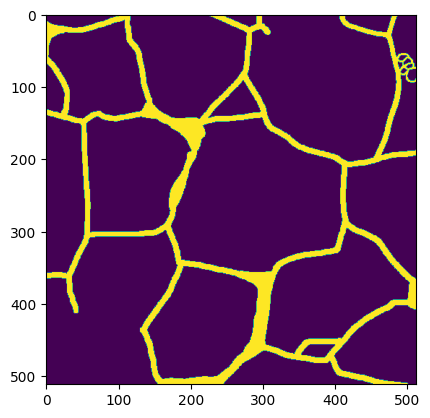

(512, 512)
[False  True]


In [45]:
print(f'image dataset size: {len(image_dataset)}')
print(f'mask dataset size: {len(mask_dataset)}')

index = np.random.randint(0, len(image_dataset)-1)
print(f'index: {index}')

plt.imshow(image_dataset[index])
plt.show()
print(f'img dataset | min: {np.min(image_dataset)} max: {np.max(image_dataset)}')
print(np.shape(image_dataset[index]))

plt.imshow(mask_dataset[index])
plt.show()
print(np.shape(mask_dataset[index]))
print(np.unique(mask_dataset[index]))

In [46]:
# Normalise the training images. The images are in 0-255 range with 3 channels
# 1600, 256, 256, 1
# image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1), 3)
image_dataset = np.expand_dims(image_dataset, 3)
# Do not normalize the masks, just rescale them to 0-1 range, because they do not have 3 colour channels.
mask_dataset = np.expand_dims((np.array(mask_dataset)),3)

print(image_dataset.shape)
print(mask_dataset.shape)
print(np.unique(image_dataset))
print(f'min, max image dataset: {np.min(image_dataset), np.max(image_dataset)}')
print(np.unique(mask_dataset))

(176, 512, 512, 1)
(176, 512, 512, 1)
[0.         0.00540541 0.00543478 0.01081081 0.01086957 0.01612903
 0.01621622 0.01630435 0.02150538 0.02162162 0.02173913 0.02702703
 0.02717391 0.03225806 0.03243243 0.0326087  0.03763441 0.03783784
 0.03804348 0.04301075 0.04324324 0.04347826 0.0483871  0.04864865
 0.04891304 0.05376344 0.05405405 0.05434783 0.05913978 0.05945946
 0.05978261 0.06451613 0.06486486 0.06521739 0.06989247 0.07027027
 0.07065217 0.07526882 0.07567568 0.07608696 0.08064516 0.08108108
 0.08152174 0.08602151 0.08648649 0.08695652 0.09139785 0.09189189
 0.0923913  0.09677419 0.0972973  0.09782609 0.10215054 0.1027027
 0.10326087 0.10752688 0.10810811 0.10869565 0.11290323 0.11351351
 0.11413043 0.11827957 0.11891892 0.11956522 0.12365591 0.12432432
 0.125      0.12903226 0.12972973 0.13043478 0.1344086  0.13513514
 0.13586957 0.13978495 0.14054054 0.14130435 0.14516129 0.14594595
 0.14673913 0.15053763 0.15135135 0.15217391 0.15591398 0.15675676
 0.1576087  0.16129032 0.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.1, random_state=0)

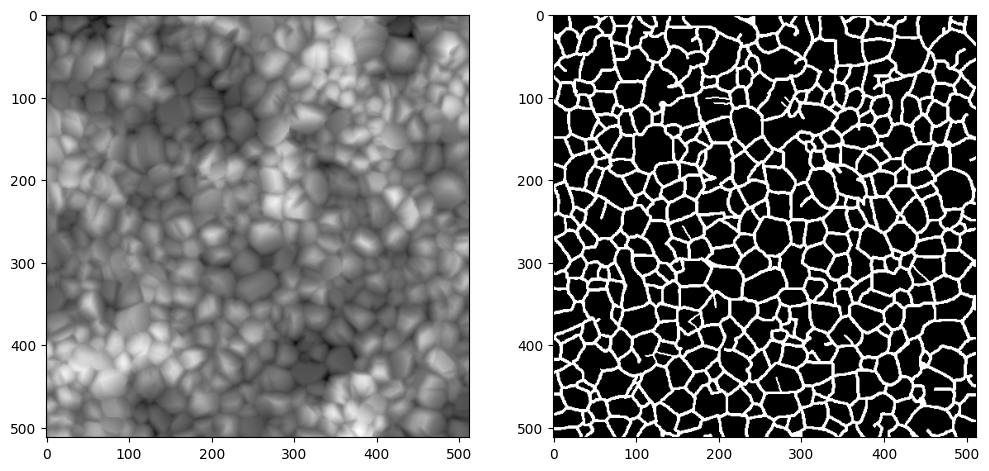

In [52]:
# Check things are working correctly
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (SIZE, SIZE)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (SIZE, SIZE)), cmap='gray')
plt.show()

In [53]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

def get_model():
    return unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 512, 512, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 512, 512, 16  0           ['conv2d_19[0][0]']              
                                )                                                           

In [ ]:
# Can load the model:
# model.load_weights('mitochondria_test.hdf5')

In [54]:
history = model.fit(
    X_train,
    y_train,
    batch_size=4,
    verbose=1,
    epochs=50,
    validation_data=(X_test, y_test),
    shuffle=False
)

# DON'T FORGET TO SAVE IT IF NEEDED
now = datetime.now()
dt_string = str(now.strftime("%Y%m%d_%H-%M-%S"))
print(dt_string)
model.save('./' + dt_string + '_perovskite_512_b4_e50.hdf5')

Epoch 1/50


2023-04-25 00:56:43.427511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.7244

2023-04-25 00:57:03.128008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 21s 484ms/step - loss: 0.5683 - accuracy: 0.7244 - val_loss: 0.5379 - val_accuracy: 0.7485
Epoch 2/50
40/40 [==============================] - 18s 448ms/step - loss: 0.5519 - accuracy: 0.7316 - val_loss: 0.5280 - val_accuracy: 0.7489
Epoch 3/50
40/40 [==============================] - 18s 450ms/step - loss: 0.5039 - accuracy: 0.7496 - val_loss: 0.4277 - val_accuracy: 0.7929
Epoch 4/50
40/40 [==============================] - 18s 448ms/step - loss: 0.4277 - accuracy: 0.7996 - val_loss: 0.3703 - val_accuracy: 0.8312
Epoch 5/50
40/40 [==============================] - 18s 449ms/step - loss: 0.3911 - accuracy: 0.8207 - val_loss: 0.3329 - val_accuracy: 0.8577
Epoch 6/50
40/40 [==============================] - 18s 448ms/step - loss: 0.3631 - accuracy: 0.8346 - val_loss: 0.3078 - val_accuracy: 0.8633
Epoch 7/50
40/40 [==============================] - 18s 448ms/step - loss: 0.3419 - accuracy: 0.8449 - val_loss: 0.2879 - val_accuracy: 0.8698
Epoch 8/50

## Load model

In [23]:
# # LOAD MODEL
# import tensorflow as tf

# model = tf.keras.models.load_model('./20230424_16-11-49_perovskite_512_b4_e50.hdf5')
# model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [55]:
# Check model accuracy
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

1/1 [==============================] - 1s 678ms/step - loss: 0.2528 - accuracy: 0.8934
Accuracy =  89.33997750282288 %


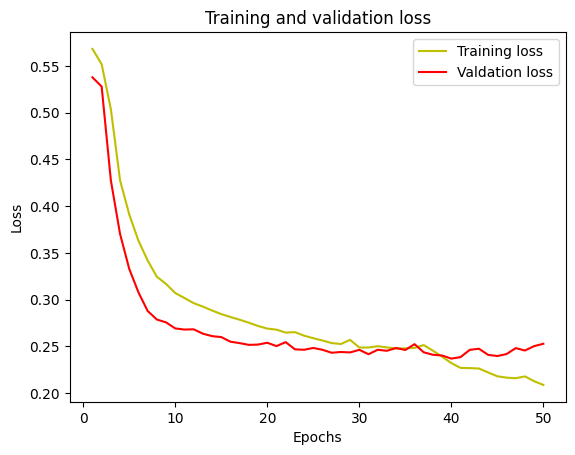

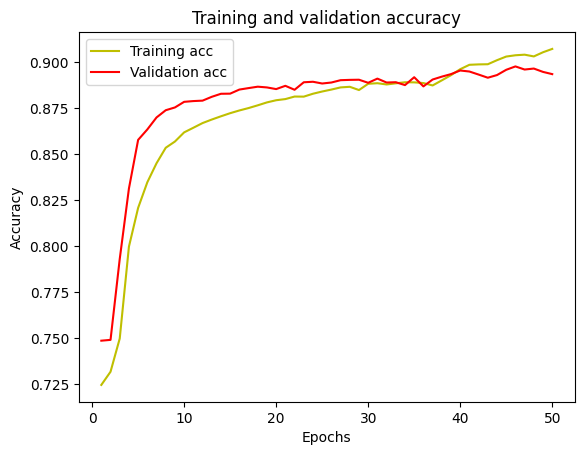

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Valdation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
# Note that for semantic segmentation, accuracy is not the correct metric.

# Calculate IOU
y_pred = model.predict(X_test)
y_pred_thresholded = y_pred > 0.5 # this value is a probability cutoff

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print(f"IoU score: {iou_score}")

2023-04-25 01:17:46.544690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 353ms/step
IoU score: 0.6569080437190673


test image number: 16 / 18
ground truth shape: (512, 512)
1/1 [==============================] - 0s 16ms/step


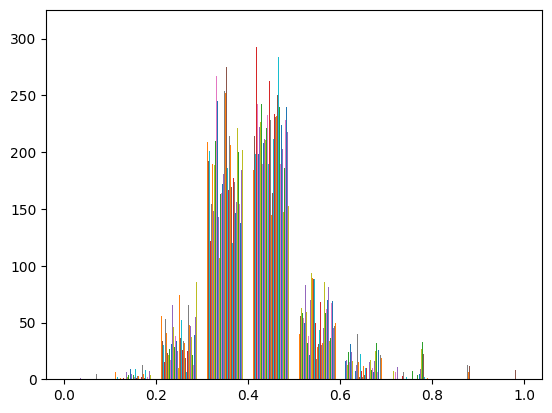

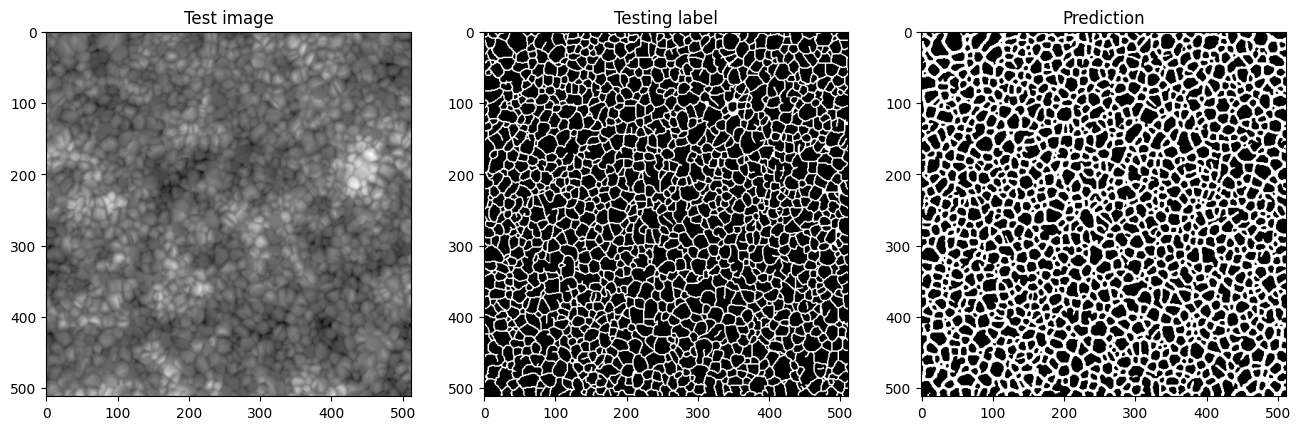

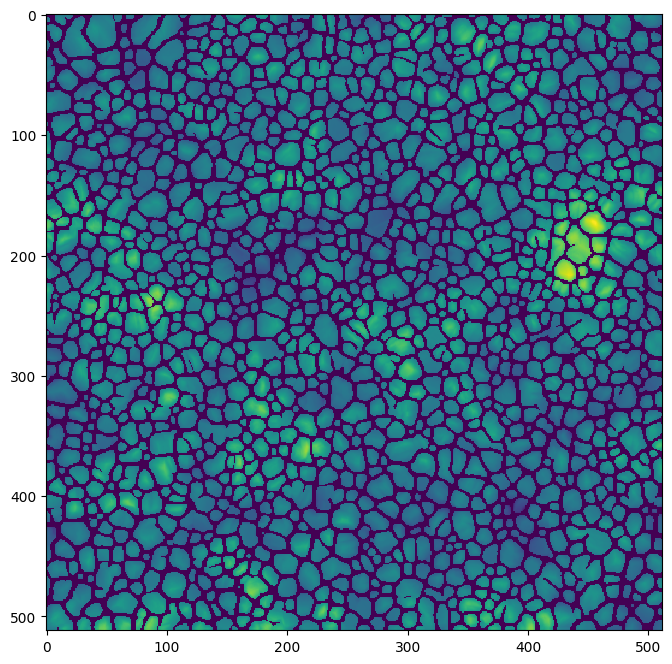

prediction shape: (512, 512)


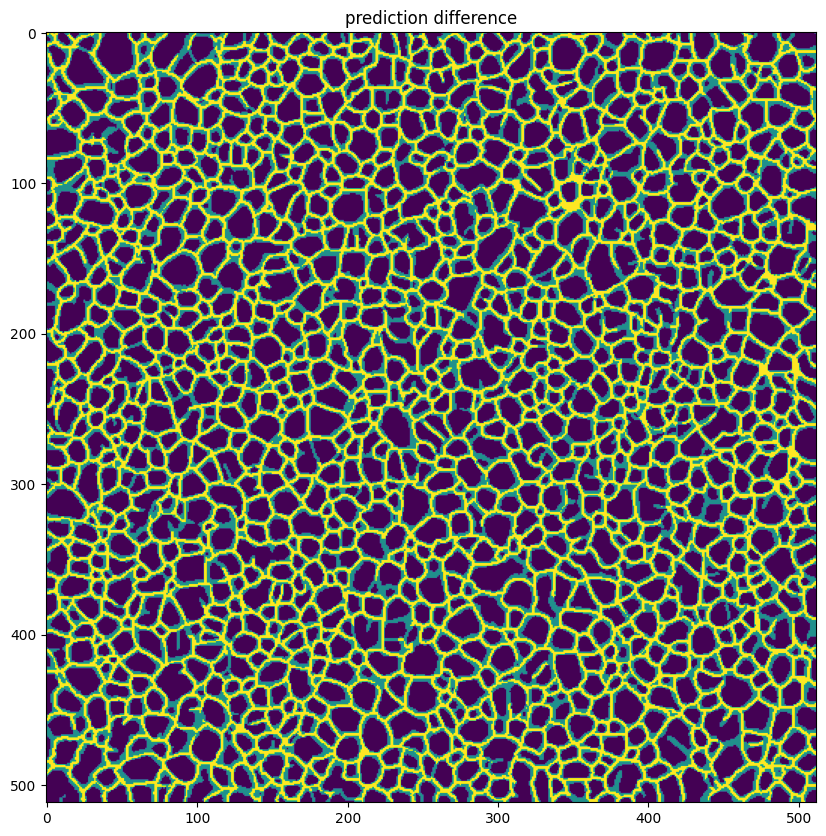

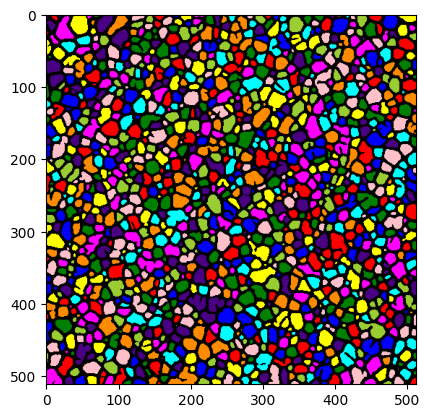

In [99]:
test_img_number = random.randint(0, len(X_test)-1)
print(f'test image number: {test_img_number} / {len(X_test)}')
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
ground_truth = ground_truth.reshape(512, 512)
print(f'ground truth shape: {ground_truth.shape}')
test_img_norm=test_img[:, :, 0][:, :, None]
plt.hist(test_img_norm[:, :, 0])
test_img_input = np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0, :, :, 0] > 0.2).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(131)
plt.title('Test image')
plt.imshow(test_img[:, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(ground_truth, cmap='gray')
plt.title('Testing label')
plt.subplot(133)
plt.imshow(prediction, cmap='gray')
plt.title('Prediction')
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(test_img)
ax.imshow(np.ma.masked_where(prediction == 0, prediction))
plt.show()

prediction = prediction == 0
print(f'prediction shape: {prediction.shape}')
difference = ground_truth.astype(int) - prediction.astype(int)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(difference)
ax.set_title('prediction difference')
plt.show()

labelled = label(prediction)
coloured = label2rgb(labelled)
plt.imshow(coloured)

In [90]:
# Flattening functions

def plane_tilt_removal(image: np.ndarray):
    read_matrix = image.copy()
    # Line of best fit
    # Calculate medians
    medians_x = [np.nanmedian(read_matrix[:, i]) for i in range(read_matrix.shape[1])]
    medians_y = [np.nanmedian(read_matrix[j, :]) for j in range(read_matrix.shape[0])]

    # Fit linear x
    px = np.polyfit(range(0, len(medians_x)), medians_x, 1)
    LOGGER.info(f"x-polyfit 1st order: {px}")
    py = np.polyfit(range(0, len(medians_y)), medians_y, 1)
    LOGGER.info(f"y-polyfit 1st order: {py}")

    if px[0] != 0:
        if not np.isnan(px[0]):
            LOGGER.info(f"Removing x plane tilt")
            for row in range(0, image.shape[0]):
                for col in range(0, image.shape[1]):
                    image[row, col] -= px[0] * (col)
        else:
            LOGGER.info(f"x gradient is nan, skipping plane tilt x removal")
    else:
        LOGGER.info("x gradient is zero, skipping plane tilt x removal")

    if py[0] != 0:
        if not np.isnan(py[0]):
            LOGGER.info(f"removing y plane tilt")
            for row in range(0, image.shape[0]):
                for col in range(0, image.shape[1]):
                    image[row, col] -= py[0] * (row)
        else:
            LOGGER.info("y gradient is nan, skipping plane tilt y removal")
    else:
        LOGGER.info("y gradient is zero, skipping plane tilt y removal")

    return image

def remove_polynomial(image: np.ndarray, mask: np.ndarray = None, order: int=2):
        image = image.copy()
        if mask is not None:
            read_matrix = np.ma.masked_array(image, mask=mask, fill_value=np.nan).filled()
        else:
            read_matrix = image

        # Calculate the median over the horizontal direction. (axis=0 since that's the dimension in which the median is taken for each
        # element of the median array)
        col_medians = np.nanmedian(read_matrix, axis=0) 

        # Fit the row median data to a polynomial
        coeffs = np.polyfit(range(0, read_matrix.shape[1]), col_medians, order)
        LOGGER.info(f"x polyfit nth order: {coeffs}")
        row_fit = np.polyval(coeffs, range(0, read_matrix.shape[1]))

        for row in range(0, read_matrix.shape[0]):
            image[row, :] -= row_fit

        return image

def zero_average(heightmap: np.ndarray) -> np.ndarray:
    median = np.nanmedian(heightmap)
    return np.subtract(heightmap, median)

def scale_heightmap(heightmap):
    heightmap = heightmap.astype(np.float32)
    min_value = heightmap.min()
    max_value = heightmap.max()
    heightmap = (heightmap - min_value) / (max_value - min_value)
    heightmap = heightmap * 255
    heightmap = heightmap.astype(np.uint8)
    return heightmap

def plot(img, title='', savepath=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(img)
    ax.set_title(title)
    if savepath is not None:
        fig.savefig(savepath)
    plt.show()

def plot_with_means(img: np.ndarray, title: str=''):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    ax[0].imshow(img)
    ax[0].set_title('image')
    ax[1].plot(np.nanmedian(img, axis=0), '.')
    ax[1].set_title('axis: 0')
    ax[2].plot(np.nanmedian(img, axis=1), '.')
    ax[2].set_title('axis: 1')
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] Extracting image from test_data/3cat_3um_2048.0_00003.spm
[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] Loading image from : test_data/3cat_3um_2048.0_00003.spm
[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] [3cat_3um_2048.0_00003] : Loaded image from : test_data/3cat_3um_2048.0_00003.spm
[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] [3cat_3um_2048.0_00003] : Extracted channel Height
[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] [3cat_3um_2048.0_00003] : Pixel to nm scaling : 1.46484375
[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] Loading image from : test_data/3cat_3um_2048.0_00003.spm
[Tue, 25 Apr 2023 01:55:35] [INFO    ] [topostats] [3cat_3um_2048.0_00003] : Loaded image from : test_data/3cat_3um_2048.0_00003.spm
[Tue, 25 Apr 2023 01:55:36] [INFO    ] [topostats] [3cat_3um_2048.0_00003] : Extracted channel Height
[Tue, 25 Apr 2023 01:55:36] [INFO    ] [topostats] [3cat_3um_2048.0_00003] : Pixel to nm scalin

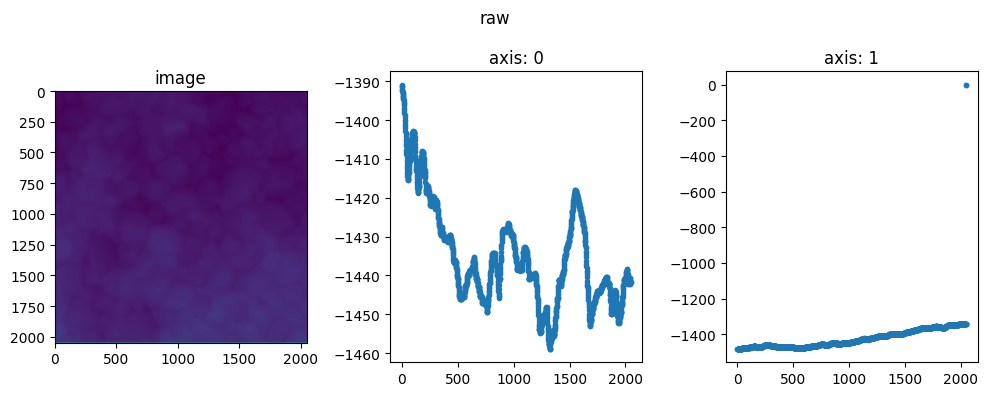

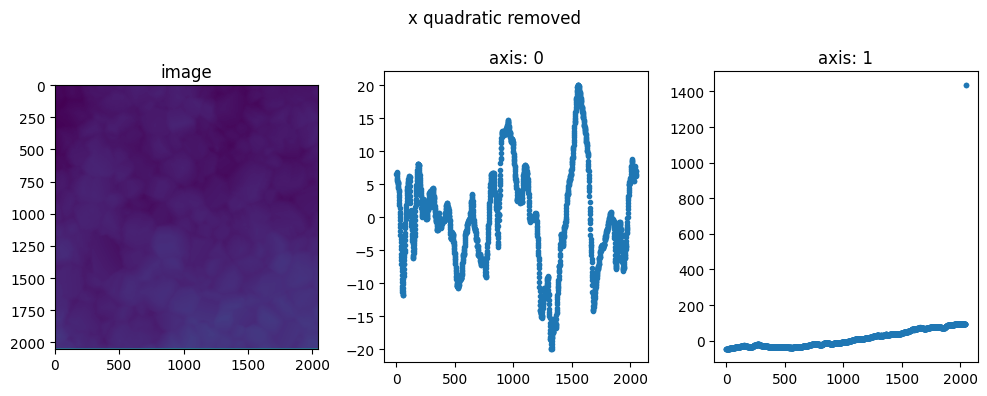

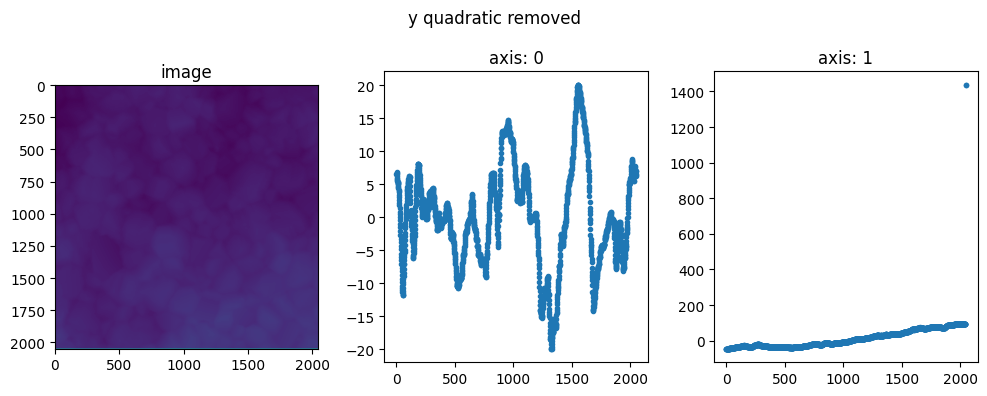

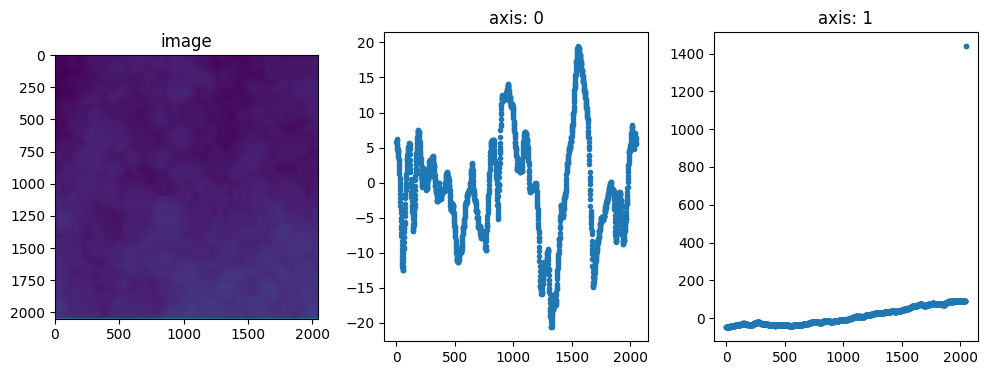

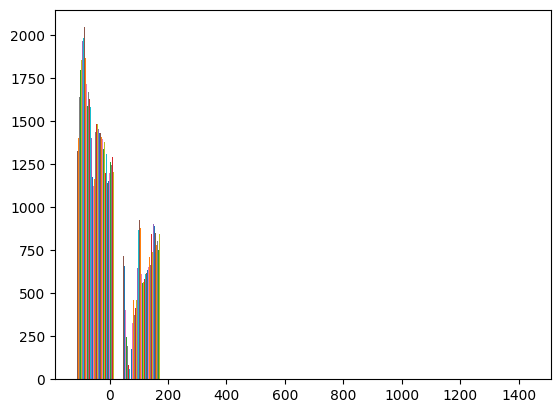

min: -125.74643273547053 max: 1448.0717962578842
min: 0.0 max: 1573.8182289933548
min: 0.0 max: 1.0


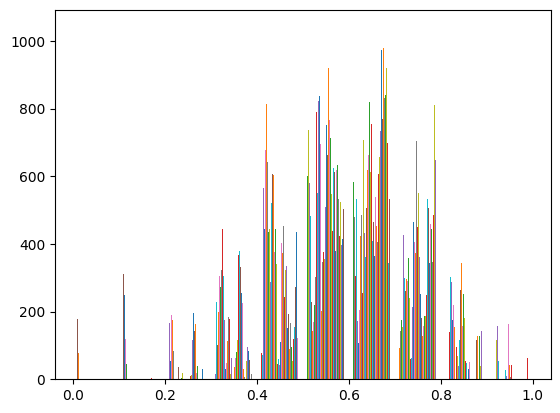

(2048, 2048)
min, max values: (0.0, 1.0)
[0.00000000e+00 2.70972402e-04 3.54637836e-04 ... 9.99540537e-01
 9.99739510e-01 1.00000000e+00]
(512, 512)
to predict shape: (1, 512, 512)
to predict shape: (1, 512, 512, 1)
1/1 [==============================] - 0s 15ms/step
[0 1]


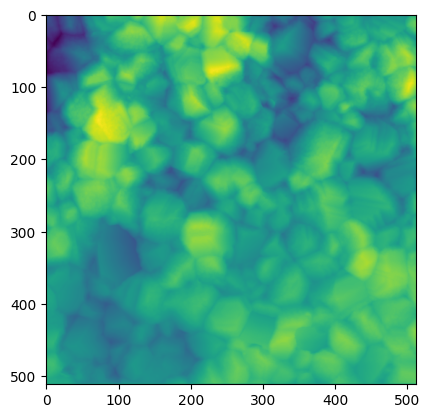

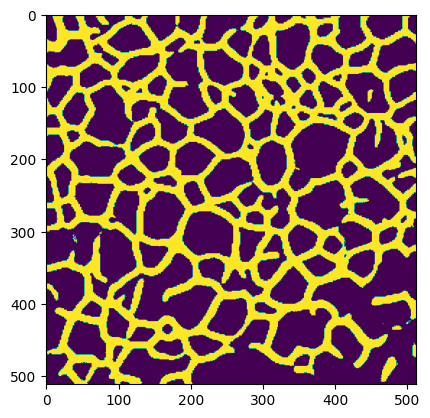

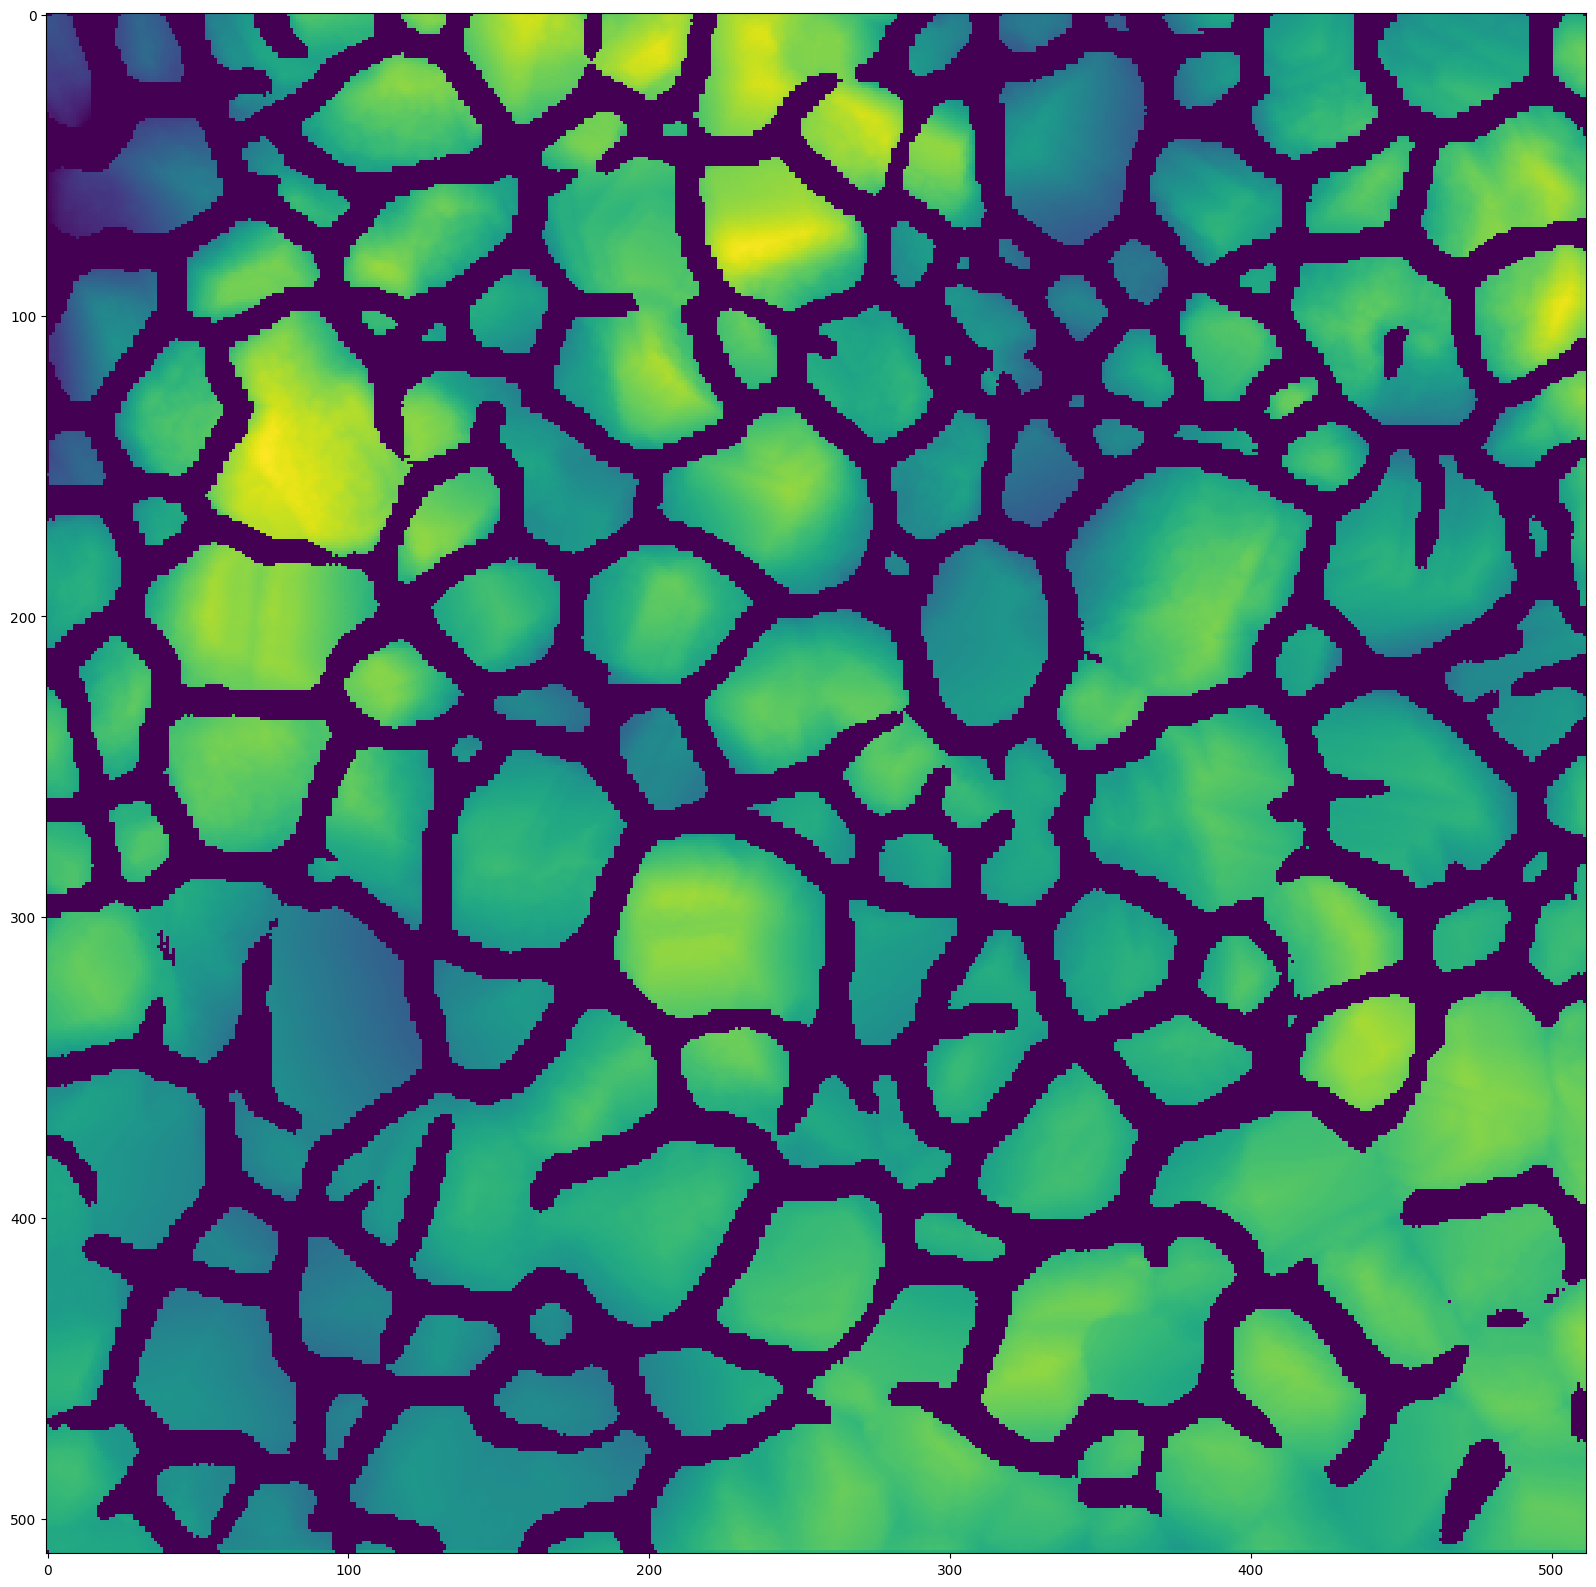

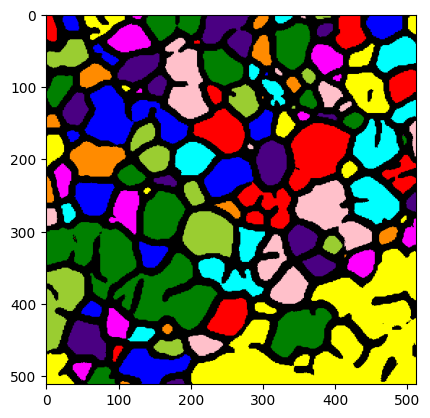

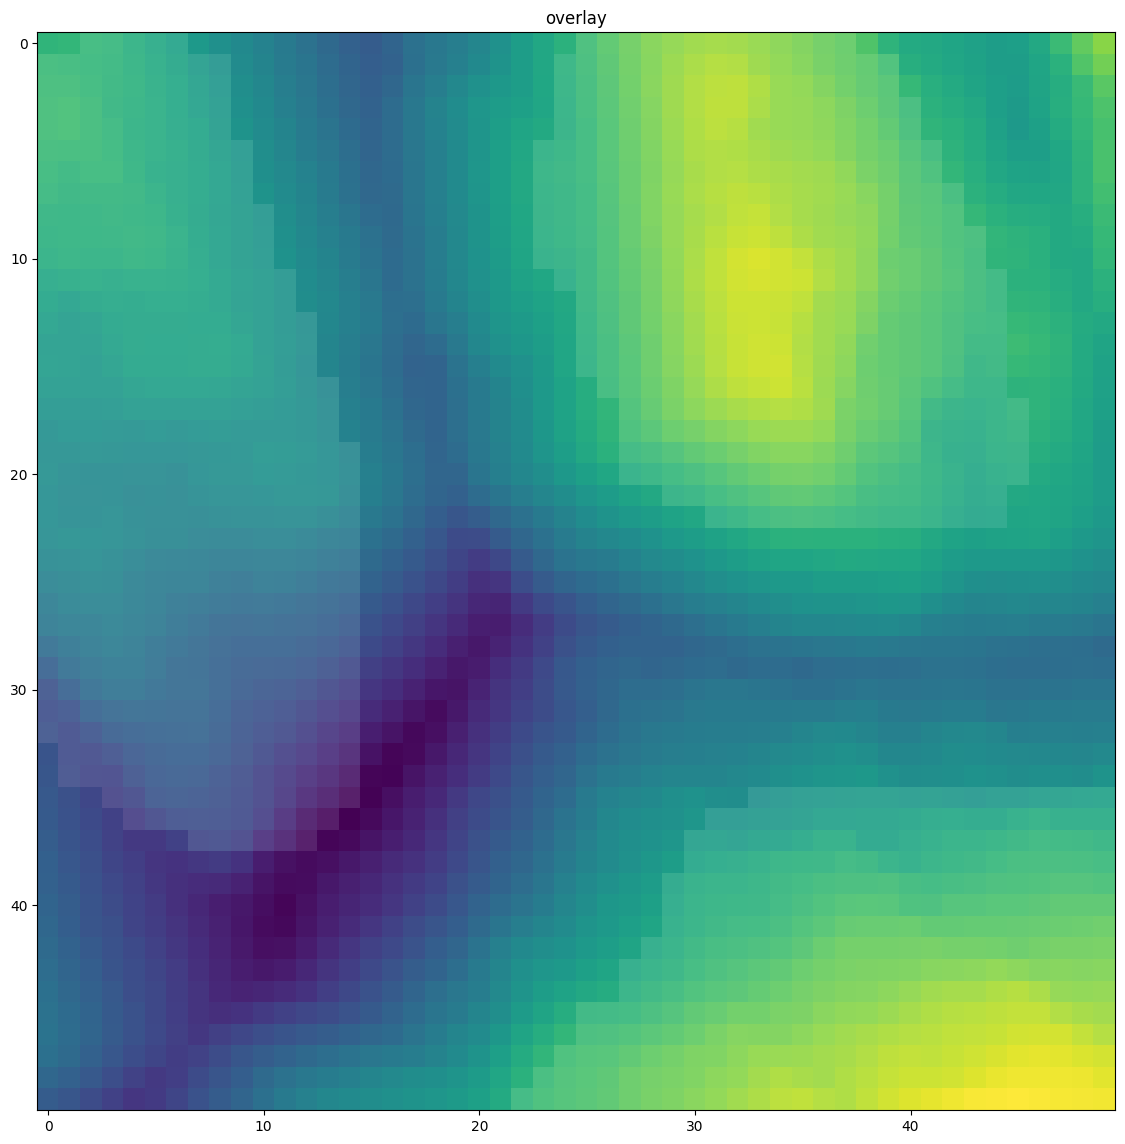

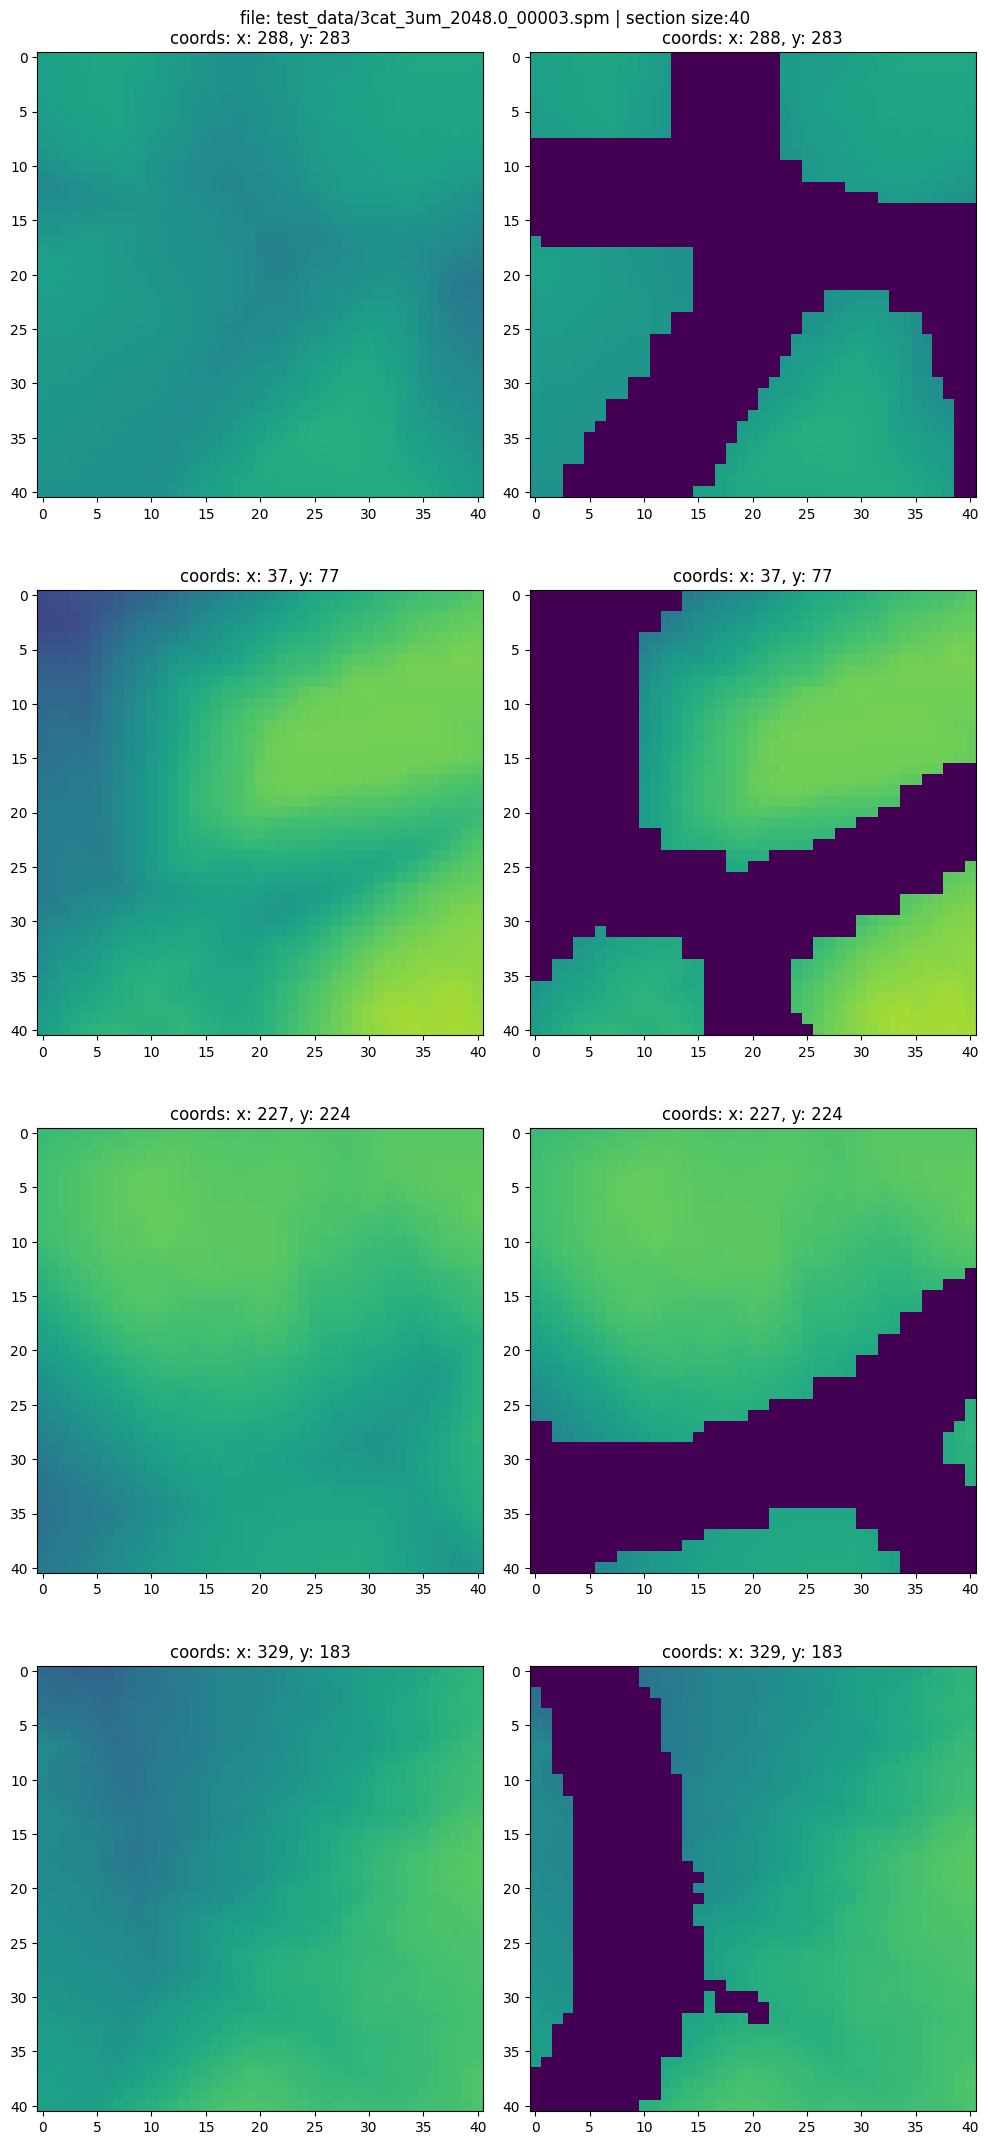

In [119]:
# Try another image
# FROM PNG
# another_image_file = './dl_data/to_be_labelled/20230207_MeO_perov_10um.0_00001.png'
# image = cv2.imread(another_image_file, 0)
# print(f'original shape: {np.sqrt(image.size)}')
# FROM SPM
another_image_file = Path('./test_data/3cat_3um_2048.0_00003.spm')
from topostats import io
# loadscan = io.LoadScans(img_paths = [file], channel='ZSensorRetrace')
loadscan = io.LoadScans(img_paths = [another_image_file], channel='Height')
loadscan.get_data()
# data, pixel_to_nm = loadscan.load_ibw()
image, pixel_to_nm = loadscan.load_spm()

# Flatten image
plot_with_means(image, title='raw')
image = remove_polynomial(image, order=3)
plot_with_means(image, title='x quadratic removed')
img = remove_polynomial(image.T, order=3).T
plot_with_means(image, title='y quadratic removed')
image = zero_average(image)
plot_with_means(image)

# Normalize image
plt.hist(image)
plt.show()
print(f'min: {np.min(image)} max: {np.max(image)}')
image = image - np.min(image)
print(f'min: {np.min(image)} max: {np.max(image)}')
image = normalize(image)
image = image / np.max(image)
print(f'min: {np.min(image)} max: {np.max(image)}')
plt.hist(image)
plt.show()

print(image.shape)
print(f'min, max values: {np.min(image), np.max(image)}')
print(np.unique(image))
image =  Image.fromarray(image)
image = image.resize((SIZE, SIZE))
image = np.array(image)
print(image.shape)

to_predict = []
to_predict.append(image)

to_predict = np.array(to_predict)
print(f'to predict shape: {to_predict.shape}')
# to_predict = np.expand_dims(normalize(to_predict), 3)
to_predict = np.expand_dims(to_predict, 3)
print(f'to predict shape: {to_predict.shape}')

test_img = to_predict[0]
test_img = test_img[:, :, 0][:, :, None]
test_img = np.expand_dims(test_img, 0)

prediction = (model.predict(test_img)[0, :, :, 0] > 0.1).astype(np.uint8)
print(np.unique(prediction))
# prediction = skeletonize(prediction)
plt.imshow(image)
plt.show()
plt.imshow(prediction)
plt.show()

fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(image)
masked = np.ma.masked_where(prediction.astype(int) == 0, prediction)
ax.imshow(masked)
plt.show()

labelled = label(prediction == 0, connectivity=1)
coloured = label2rgb(labelled)
fig, ax = plt.subplots()
ax.imshow(coloured)
plt.show()

fig, ax = plt.subplots(figsize=(14, 14))
test_mask = np.zeros(image.shape)
for j in range(coloured.shape[0]):
    for i in range(coloured.shape[1]):
        if np.array_equal(coloured[j, i], np.array([0, 0, 0])):
            test_mask[j, i] = 1


overlay = np.zeros(image.shape)

test_masked = np.ma.masked_where(test_mask == 1, overlay)
ax.imshow(image[0:50, 0:50])
ax.imshow(test_masked[0:50, 0:50], alpha=0.1, cmap='binary')
ax.set_title('overlay')


fig, ax = plt.subplots(4, 2, figsize=(10, 22))
section_size = 40
vmin = np.min(image)
vmax = np.max(image)
for index in range(ax.shape[0]):
    y = np.random.randint(0, image.shape[0]-section_size)
    x = np.random.randint(0, image.shape[1]-section_size)
    img_section = image[y:y+section_size+1, x:x+section_size+1]
    mask_section = masked[y:y+section_size+1, x:x+section_size+1]
    ax[index, 0].imshow(img_section, vmin=vmin, vmax=vmax)
    ax[index, 1].imshow(img_section, vmin=vmin, vmax=vmax)
    ax[index, 1].imshow(mask_section)
    ax[index, 0].set_title(f'coords: x: {x}, y: {y}')
    ax[index, 1].set_title(f'coords: x: {x}, y: {y}')
fig.suptitle(f'file: {another_image_file} | section size:{section_size}')
fig.tight_layout()


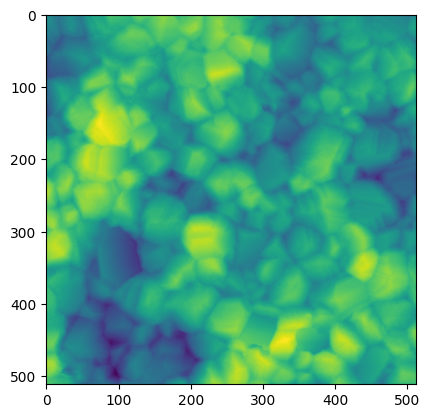

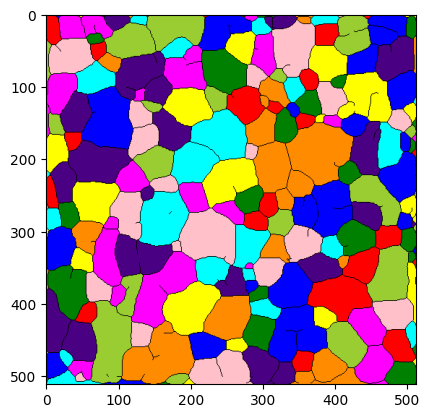

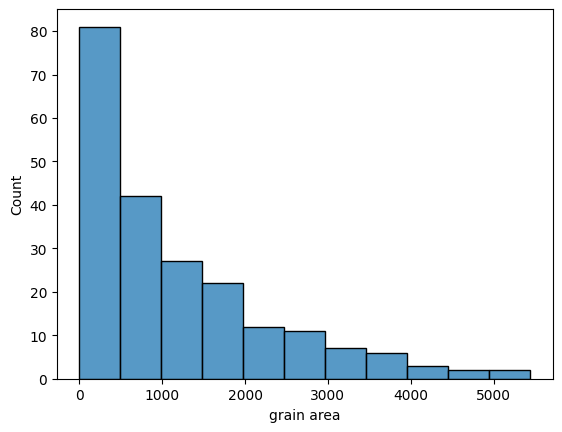

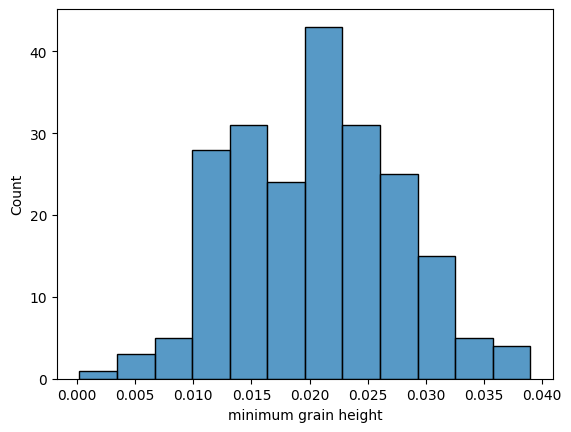

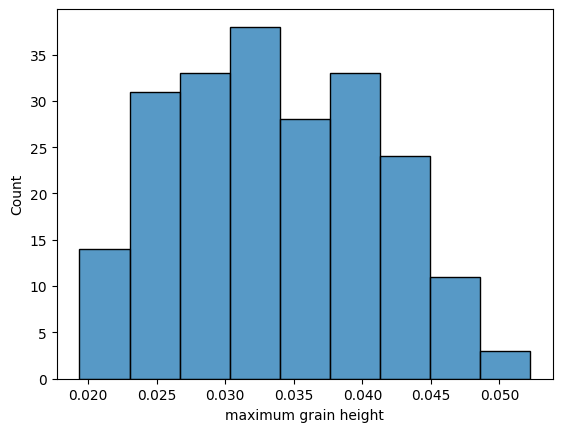

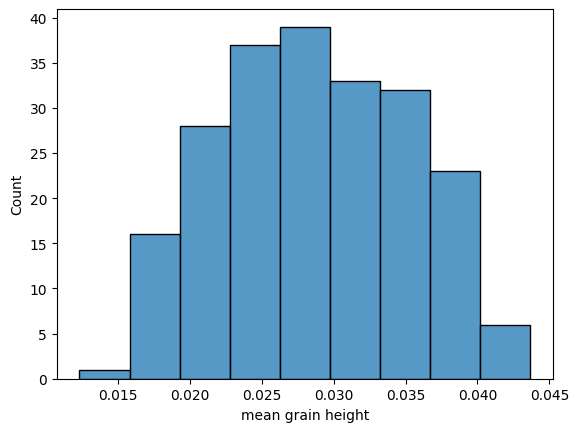

mean grain area: 1162.7488372093023
mean mean grain height: 0.028749652206897736
number of grains: 215


In [39]:
# Grain stats

areas = []
mean_heights = []
max_heights = []
min_heights = []

region_props = regionprops(labelled)
for index, props in enumerate(region_props):
    if props.label == 0:
        pass
    else:
        areas.append(props.area)
        heights = image[labelled == props.label]
        mean_heights.append(np.mean(heights))
        min_heights.append(np.min(heights))
        max_heights.append(np.max(heights))

plt.imshow(image)
plt.show()
plt.imshow(coloured)
plt.show()

ax = sns.histplot(areas)
ax.set_xlabel('grain area')
plt.show()

ax = sns.histplot(min_heights)
ax.set_xlabel('minimum grain height')
plt.show()

ax = sns.histplot(max_heights)
ax.set_xlabel('maximum grain height')
plt.show()

ax = sns.histplot(mean_heights)
ax.set_xlabel('mean grain height')
plt.show()

print(f'mean grain area: {np.mean(areas)}')
print(f'mean mean grain height: {np.mean(mean_heights)}')
print(f'number of grains: {len(areas)}')